In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
artists = sns.load_dataset("artists")
artists.head()
artists.tail()

,id,name,years,genre,nationality,bio,wikipedia,paintings
45,45,Andy Warhol,1928 – 1987,Pop Art,American,"Andy Warhol (; born Andrew Warhola; August 6, ...",https://en.wikipedia.org/wiki/Andy_Warhol,181
46,46,Paul Gauguin,1848 – 1903,"Symbolism,Post-Impressionism",French,"Eugène Henri Paul Gauguin (UK: , US: ; French:...",http://en.wikipedia.org/wiki/Paul_Gauguin,311
47,47,Raphael,1483 – 1520,High Renaissance,Italian,Raffaello Sanzio da Urbino (Italian: [raffaˈɛl...,https://en.wikipedia.org/wiki/Raphael,109
48,48,Michelangelo,1475 – 1564,High Renaissance,Italian,Michelangelo di Lodovico Buonarroti Simoni or ...,https://en.wikipedia.org/wiki/Michelangelo,49
49,49,Jackson Pollock,1912 – 1956,Abstract Expressionism,American,"Paul Jackson Pollock (; January 28, 1912 – Aug...",http://en.wikipedia.org/wiki/Jackson_Pollock,24


In [33]:
artists.describe()

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [12]:
# Split the place of birth on commas
nationality = artists.nationality.str.split(',', 1).tolist()
nationality = [x for x in nationality if str(x) != 'nan']
print(nationality)
countries = []

# Process countries and clean up text
for entry in nationality:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['country'])

# Create numeric counts
cntry_counts = pd.DataFrame(countries.country.value_counts())
other = int(cntry_counts[10:].sum())
cntry_counts = cntry_counts[:10]
cntry_counts.loc[11] = other
cntry_counts = cntry_counts.rename(index={11: 'Other'})


[['Italian'], ['Russian'], ['Mexican'], ['French'], ['Belgian'], ['Spanish'], ['French'], ['Russian'], ['Dutch'], ['Austrian'], ['Dutch'], ['Russian'], ['Russian'], ['Spanish'], ['Flemish'], ['French'], ['Spanish'], ['Mexican'], ['Spanish', 'Greek'], ['German'], ['French', 'British'], ['Flemish'], ['French', 'Jewish,Belarusian'], ['Italian'], ['Italian'], ['Italian'], ['Italian'], ['Spanish'], ['French'], ['Flemish'], ['French'], ['Dutch'], ['Italian'], ['French'], ['French'], ['French'], ['British'], ['Norwegian'], ['French'], ['French'], ['French'], ['French'], ['German', 'Swiss'], ['Dutch'], ['Spanish'], ['American'], ['French'], ['Italian'], ['Italian'], ['American']]


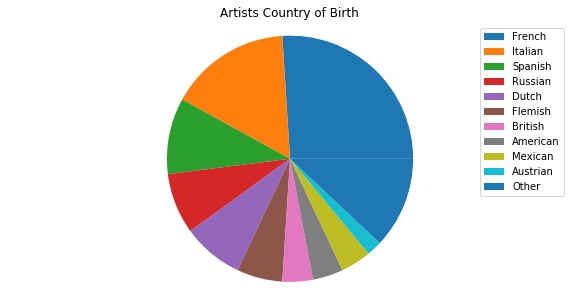

In [13]:
plt.figure(figsize=(10, 5))
plt.pie(cntry_counts.country)
plt.axis('equal')
plt.title('Artists Country of Birth')
plt.legend(cntry_counts.index)

[ 0  1  2  3  4  5  6  7  8  9 10]


<BarContainer object of 11 artists>

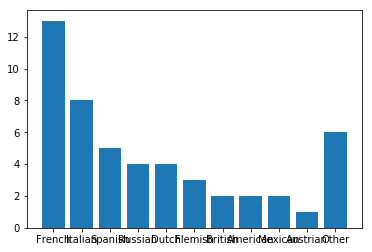

In [23]:
print(np.arange(11))
plt.bar(x=cntry_counts.index,height=cntry_counts.country)

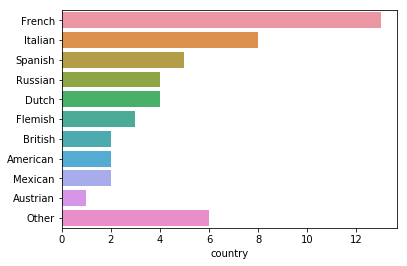

In [29]:
sns.barplot(y=cntry_counts.index,x=cntry_counts.country, orient="h")

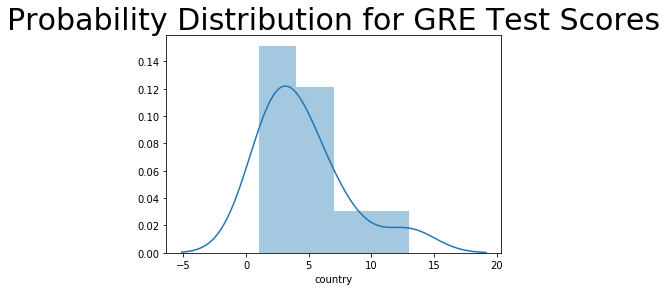